### Data Analysis and Visualisation on BigMart Sales Dataset 

#### Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
train_data=pd.read_csv('/home/komal/Downloads/Sales_train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


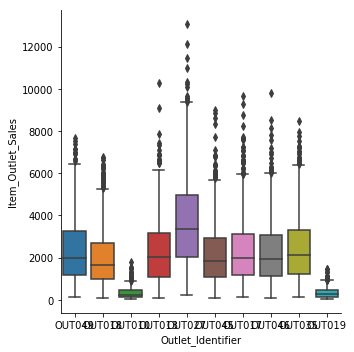

In [4]:
sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales", kind="box", data=train_data);

#### Data Processing 

In [5]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(), inplace=True)

In [7]:
train_data['Outlet_Size'].mode()[0]

'Medium'

In [8]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [9]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Data Analysis and Data Viz 

In [10]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
train_data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train_data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [12]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

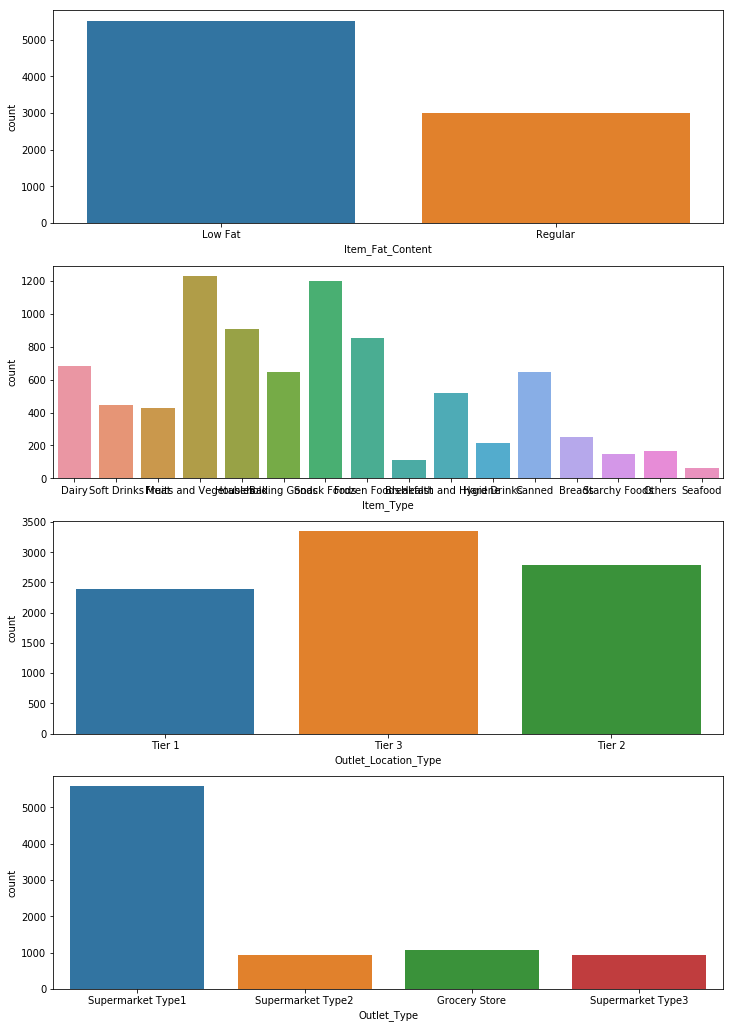

In [13]:
f, ax = plt.subplots(4, figsize=(12,18))
sns.countplot('Item_Fat_Content', data=train_data, ax=ax[0])
sns.countplot('Item_Type', data=train_data, ax=ax[1])
sns.countplot('Outlet_Location_Type', data=train_data, ax=ax[2])
sns.countplot('Outlet_Type', data=train_data, ax=ax[3])

In [14]:
# quite a lot of items were of low fat category than regular one
# some item types are in large quantities covering most of the total.
# good distribution is seen in case of outlet_location_type
# good number of outlets are of single type of supermarket

In [15]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

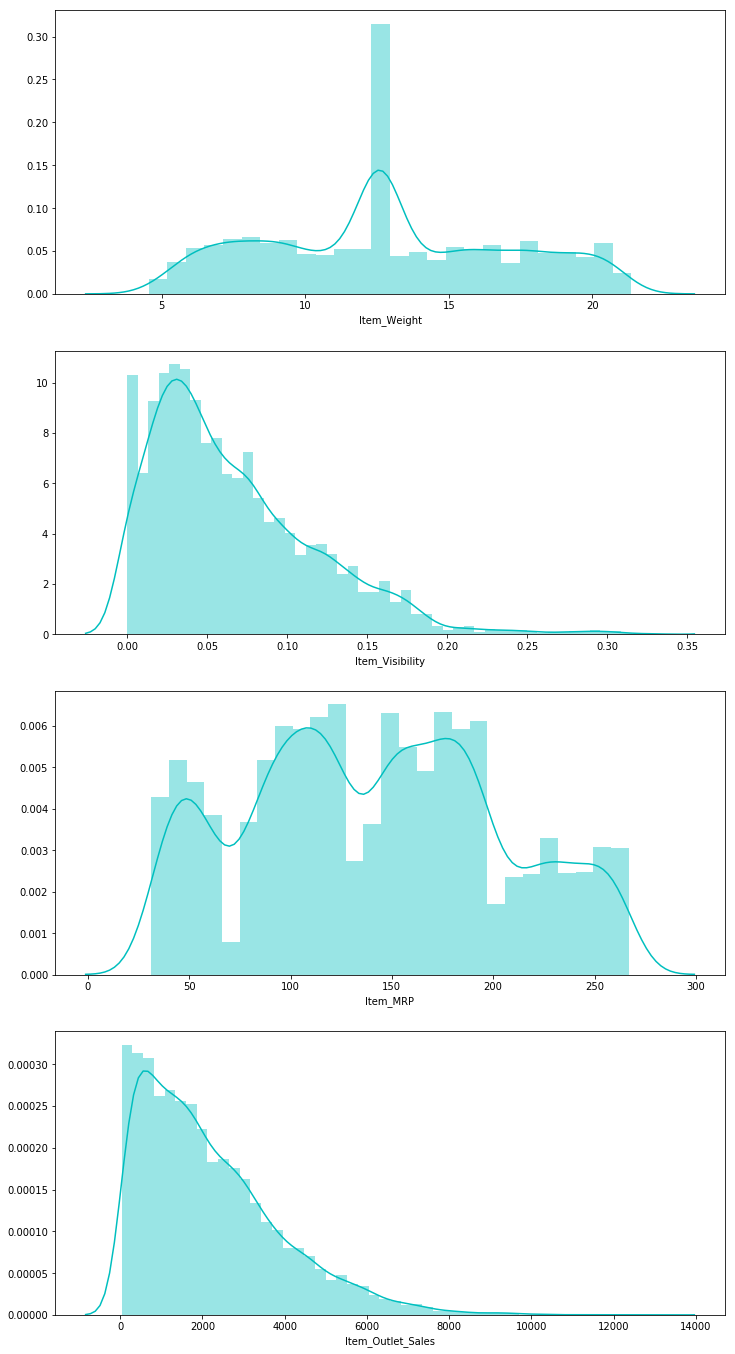

In [17]:
f, ax = plt.subplots(4, figsize=(12,24))
sns.distplot(train_data.Item_Weight,color='c',ax=ax[0])
sns.distplot(train_data.Item_Visibility,color='c',ax=ax[1])
sns.distplot(train_data.Item_MRP,color='c',ax=ax[2])
sns.distplot(train_data.Item_Outlet_Sales,color='c',ax=ax[3])

In [18]:
# Item weight peaks around at 13
# Almost all items have visibility less than 0.20
# Although the visibility of the item can't be 0 if it is present in the store
# MRP of items is between 100 to 200
# Sales of most of the items is below 4000

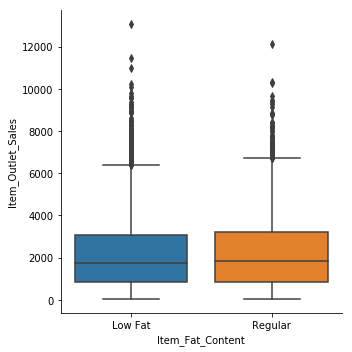

In [19]:
sns.catplot(x="Item_Fat_Content", y="Item_Outlet_Sales", kind="box", data=train_data);

In [20]:
# Mostly fat content is not varying the sales. it is almost the same for both content type items. 
# Although low fat content type have more outliers than the regular one.


[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

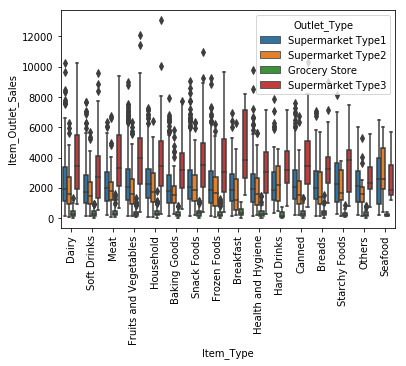

In [32]:
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales',hue='Outlet_Type', data=train_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [22]:
#Item Type is not featurely important as a great variation of a particular item type is not seen in the graph.
#All item types have mediocre range of sale.

[Text(0,0,'Tier 1'), Text(0,0,'Tier 3'), Text(0,0,'Tier 2')]

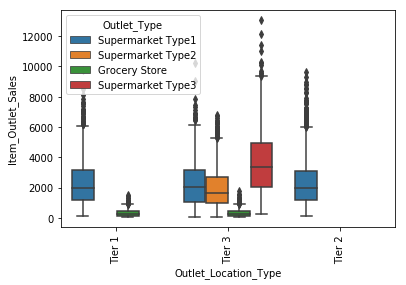

In [33]:
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type', data=train_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

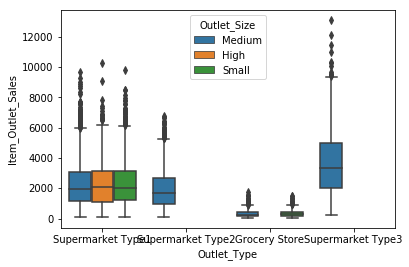

In [30]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size', data=train_data)

In [25]:
# Outlets of Supermarket type 3 have the highest recorded sales between the major range of 2000 to 5000
# Sales in Grocery Store is far less as compared to Supermarkets
# However, the various types of supermarkets cannot be distinguished that easily.
# This is probably due to other factors, e.g. their location, how long they have been in operation, how well they are managed, etc.

In [26]:
train_data.groupby(['Outlet_Size','Outlet_Type'])['Outlet_Size'].count().unstack('Outlet_Type').fillna(0)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0.0,932.0,0.0,0.0
Medium,555.0,2785.0,928.0,935.0
Small,528.0,1860.0,0.0,0.0


In [27]:
train_data.groupby(['Outlet_Size','Outlet_Location_Type'])['Outlet_Size'].count().unstack('Outlet_Location_Type').fillna(0)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0.0,0.0,932.0
Medium,930.0,1855.0,2418.0
Small,1458.0,930.0,0.0


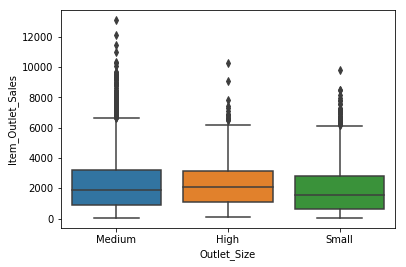

In [28]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data)

In [ ]:
train_data.groupby(['Outlet_Size','Item_Outlet_Sales']).count().unstack().plot(kind='bar', stacked=True)

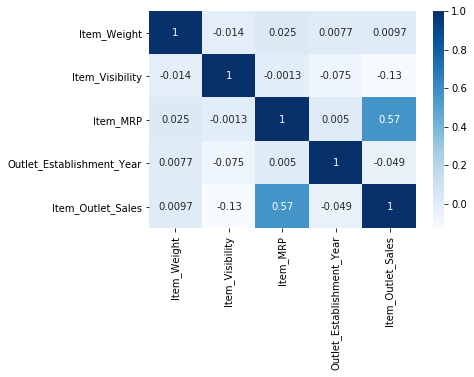

In [34]:
sns.heatmap(train_data.corr(),cmap='Blues',annot=True)

In [ ]:
# The most affected quantity is Item_MRP. as it is the most affected quantity with item_sales